In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [36]:
# Set seed for reproducibility
rng = np.random.default_rng(seed=42)

# Generate a wider "U‑shaped" dataset
X = np.linspace(-10, 10, 200).reshape(-1, 1)          # broader x‑range
noise = rng.normal(scale=4, size=X.shape)             # bigger noise for vertical spread
y = 0.6 * X**2 + 1.0 * X + 2 + noise        

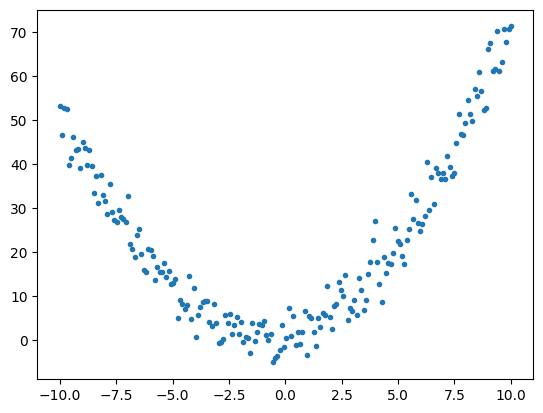

In [37]:
plt.plot(X, y, '.')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
poly = PolynomialFeatures(degree = 2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [40]:
print(X_train[0])
print(X_train_trans[0])

[-2.06030151]
[ 1.         -2.06030151  4.2448423 ]


In [41]:
lr = LinearRegression()

lr.fit(X_train_trans, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
y_pred = lr.predict(X_test_trans)

In [43]:
r2_score(y_test, y_pred)

0.956392050545113

In [44]:
print(lr.intercept_)
print(lr.coef_)

[1.63332324]
[[0.         1.02080665 0.61034722]]


In [64]:
x_line = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
x_line_trans = poly.transform(x_line)
y_line = lr.predict(x_line_trans)

/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


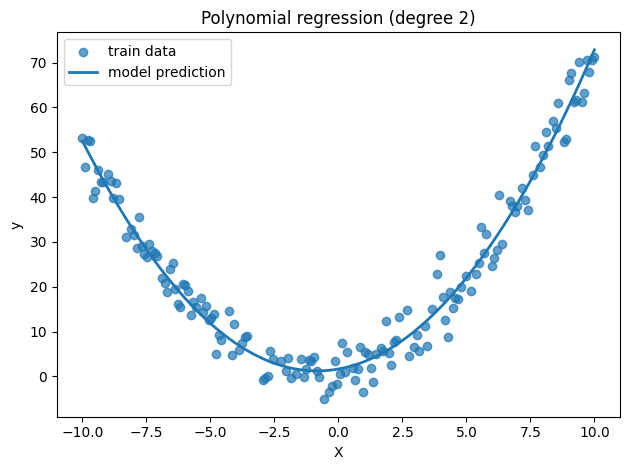

In [66]:
# --- plot ---
plt.scatter(X_train, y_train, label="train data", alpha=0.7)
plt.plot(x_line, y_line, linewidth=2, label="model prediction")
plt.title("Polynomial regression (degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()